In [ ]:
from google.colab import files
files.upload()

In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

In [3]:
data = pd.read_csv('customer_booking.csv', encoding="ISO-8859-1")
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


# **Feature Description**

**num_passengers** = number of passengers travelling.

**sales_channel** = sales channel booking was made on.

**trip_type** = trip Type (Round Trip, One Way, Circle Trip).

**purchase_lead** = number of days between travel date and booking date.

**length_of_stay** = number of days spent at destination.

**flight_hour** = hour of flight departure.

**flight_day** = day of week of flight departure.

**route** = origin -> destination flight route.

**booking_origin** = country from where booking was made.

**wants_extra_baggage** = if the customer wanted extra baggage in the booking.

**wants_preferred_seat** = if the customer wanted a preferred seat in the booking.

**wants_in_flight_meals** = if the customer wanted in-flight meals in the booking.

**flight_duration** = total duration of flight (in hours).

**booking_complete** = flag indicating if the customer completed the booking.


In [4]:
# Looking at the shape
data.shape

(50000, 14)

In [5]:
# Looking at the info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [6]:
# Looking at the column
data.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [7]:
# Renaming the column
new_cols = {
  'num_passengers' : 'num_passengers',
  'sales_channel' : 'sales_channel',
  'trip_type' : 'trip_type',
  'purchase_lead' : 'purchase_lead',
  'length_of_stay' : 'length_of_stay',
  'flight_hour' : 'flight_hour',
  'flight_day' : 'flight_day',
  'route' : 'route',
  'booking_origin' : 'booking_origin',
  'wants_extra_baggage' : 'extra_baggage',
  'wants_preferred_seat' : 'preferred_seat',
  'wants_in_flight_meals' : 'flight_meals',
  'flight_duration' : 'flight_duration',
  'booking_complete' : 'booking_complete'
}

data.rename(new_cols, axis = 1, inplace=True)

In [8]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,extra_baggage,preferred_seat,flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [9]:
# checking the null values in dataset
data.isna().sum()

num_passengers      0
sales_channel       0
trip_type           0
purchase_lead       0
length_of_stay      0
flight_hour         0
flight_day          0
route               0
booking_origin      0
extra_baggage       0
preferred_seat      0
flight_meals        0
flight_duration     0
booking_complete    0
dtype: int64

In [10]:
# Checking the duplcates values
data.duplicated().sum()

719

In [11]:
data = data.drop_duplicates()
data.shape

(49281, 14)

In [12]:
# Statistic of the dataset
data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,extra_baggage,preferred_seat,flight_meals,flight_duration,booking_complete
count,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000
mean,1.590187,84.723281,23.053976,9.070676,0.668229,0.295631,0.426635,7.279974,0.149977
std,1.016538,90.410229,33.832149,5.413099,0.470854,0.456331,0.494593,1.496390,0.357052
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


# **About the Dataset**


*   **Data Size**: The dataset contain 49283 rows and 14 columns.
*   **Data Types**: The data contains features with data types int64, float64, Object.


*   **Missing Values**: No column has missing values in the dataset, which simplifies the data cleaning process.
*   **Duplicate Values**: The dataset has 719 duplicates values.


*   **Unique Value**: The number of unique values varies among features.
*   **Statistical Details**: The 'min', 'max', 'mean', 'std' values indicates the range and dispersion of data for each column, highlighting potential outliers or anomalies.







In [13]:
data.corr()

<ipython-input-13-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,num_passengers,purchase_lead,length_of_stay,flight_hour,extra_baggage,preferred_seat,flight_meals,flight_duration,booking_complete
num_passengers,1.000000,0.214999,-0.115380,0.016393,0.120724,0.029509,0.022252,-0.062028,0.024092
purchase_lead,0.214999,1.000000,-0.076747,0.035112,-0.021599,-0.004459,-0.022533,0.067934,-0.022132
length_of_stay,-0.115380,-0.076747,1.000000,-0.025525,0.177536,0.031215,0.098846,0.140408,-0.042080
flight_hour,0.016393,0.035112,-0.025525,1.000000,-0.010911,0.012251,0.011953,-0.003236,0.006705
extra_baggage,0.120724,-0.021599,0.177536,-0.010911,1.000000,0.208392,0.216835,0.057637,0.068452
preferred_seat,0.029509,-0.004459,0.031215,0.012251,0.208392,1.000000,0.315162,0.100652,0.050189
flight_meals,0.022252,-0.022533,0.098846,0.011953,0.216835,0.315162,1.000000,0.156233,0.026399
flight_duration,-0.062028,0.067934,0.140408,-0.003236,0.057637,0.100652,0.156233,1.000000,-0.106529
booking_complete,0.024092,-0.022132,-0.042080,0.006705,0.068452,0.050189,0.026399,-0.106529,1.000000


<ipython-input-14-f65ef3a5f435>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=data.corr(), fmt='.2f', annot_kws=None, linewidths= 2, annot=True)


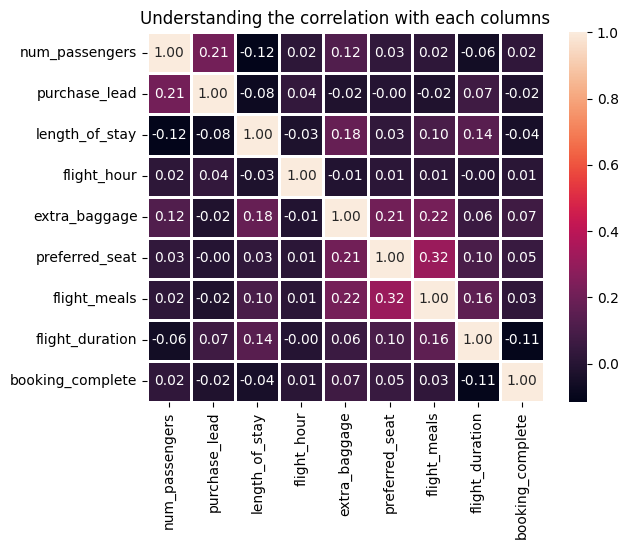

In [14]:
# Visualizing the correlation map
sns.heatmap(data=data.corr(), fmt='.2f', annot_kws=None, linewidths= 2, annot=True)
plt.title('Understanding the correlation with each columns')
plt.show()

**Exploratory Data Analysis**

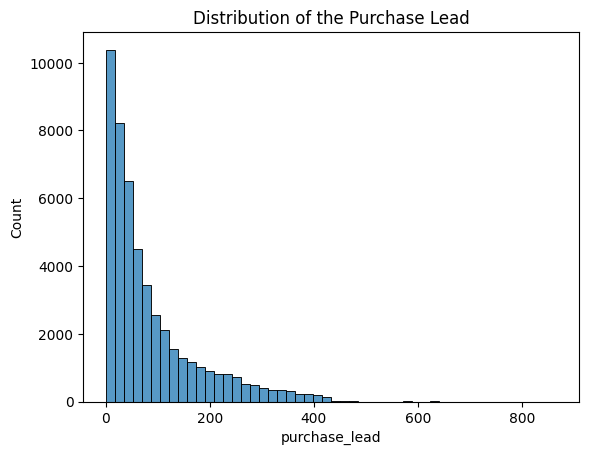

In [15]:
# Distribution of days between travel
sns.histplot(data=data, x='purchase_lead',bins=50)
plt.title('Distribution of the Purchase Lead')
plt.show()

In [16]:
# TOP 10 demanding origin
top_10_countries = data['booking_origin'].value_counts().nlargest(10)
top_10_countries.index

Index(['Australia', 'Malaysia', 'South Korea', 'Japan', 'China', 'Indonesia',
       'Taiwan', 'Thailand', 'India', 'New Zealand'],
      dtype='object')

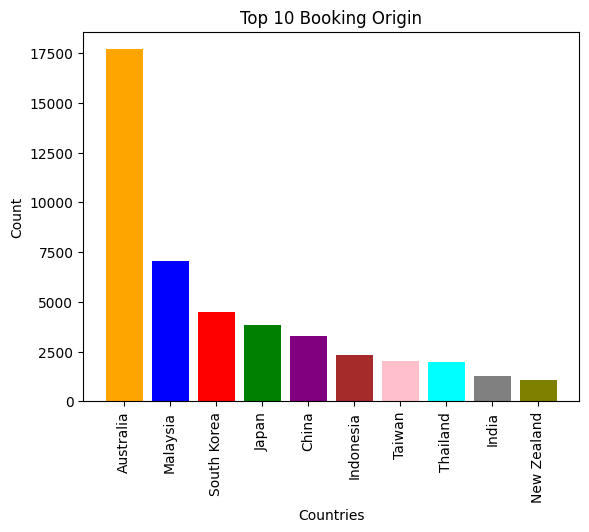

In [17]:
# Create bar plot visualizing the top 10 most demanding origin
color = ['orange','blue','red','green','purple','brown','pink','cyan','gray','olive']
plt.bar(x=top_10_countries.index,height=top_10_countries.values, color=color)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Top 10 Booking Origin')
plt.xticks(rotation = 90)
plt.show()

In [18]:
data['booking_complete'].value_counts()

0    41890
1     7391
Name: booking_complete, dtype: int64

In [19]:
# Count of complete booking
data['booking_complete'].value_counts()

0    41890
1     7391
Name: booking_complete, dtype: int64

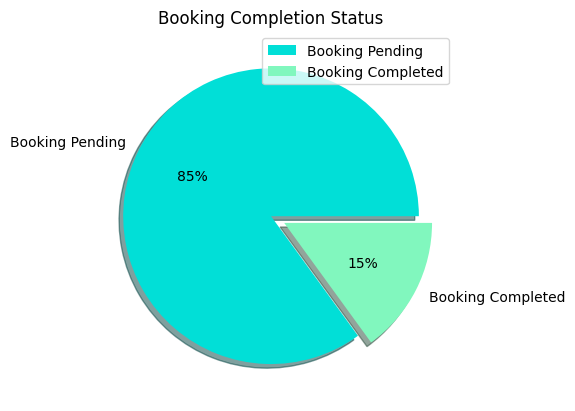

In [20]:
# Chart of the completion status
result = ['41890','7391']
labels = ['Booking Pending','Booking Completed']

plt.pie(result, labels=labels, autopct='%1.0f%%', explode=[0,0.1], colors=['#01DFD7','#81F7BE'], shadow=True)
plt.title('Booking Completion Status')
plt.legend()
plt.show()

RoundTrip     48779
OneWay          386
CircleTrip      116
Name: trip_type, dtype: int64


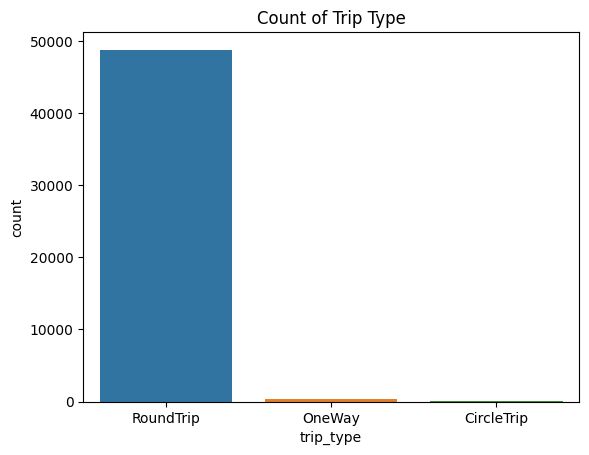

In [21]:
# Barplot of the trip type
print(data['trip_type'].value_counts())

sns.countplot(data=data, x='trip_type', order=data['trip_type'].value_counts().index)
plt.title('Count of Trip Type')
plt.show()

In [22]:
# Average flight duraton of top 20 destination
top_20 = data.groupby('booking_origin').agg({
    'flight_duration': 'mean'
})

top_20_sort = top_20.sort_values(by = 'flight_duration',ascending=False).head(20)
top_20_sort = pd.DataFrame(top_20_sort).reset_index()

In [23]:
top_20_sort

,booking_origin,flight_duration
0,Hungary,8.830000
1,Tanzania,8.830000
2,Iraq,8.830000
3,Slovakia,8.830000
4,Nicaragua,8.830000
5,Norfolk Island,8.830000
6,Solomon Islands,8.830000
7,Czechia,8.830000
8,Panama,8.830000
9,Cyprus,8.830000


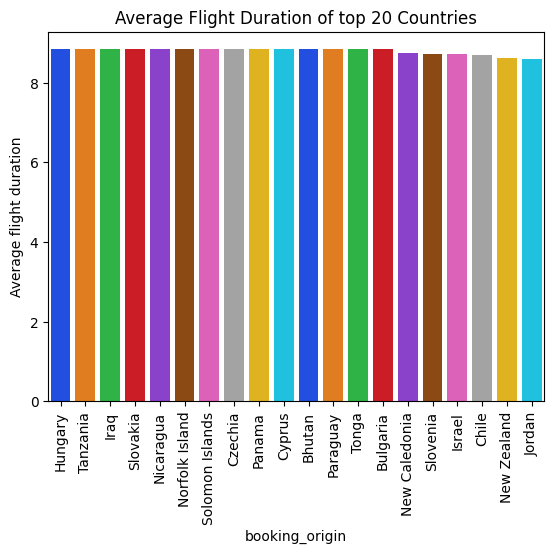

In [24]:
sns.barplot(x='booking_origin', y='flight_duration', data= top_20_sort, palette='bright')
plt.xticks(rotation=90)
plt.ylabel('Average flight duration')
plt.title('Average Flight Duration of top 20 Countries')
plt.show()

In [25]:
# Count of tickets status
data.groupby('flight_day')['booking_complete'].count()

flight_day
Fri    6685
Mon    7988
Sat    5723
Sun    6442
Thu    7323
Tue    7558
Wed    7562
Name: booking_complete, dtype: int64

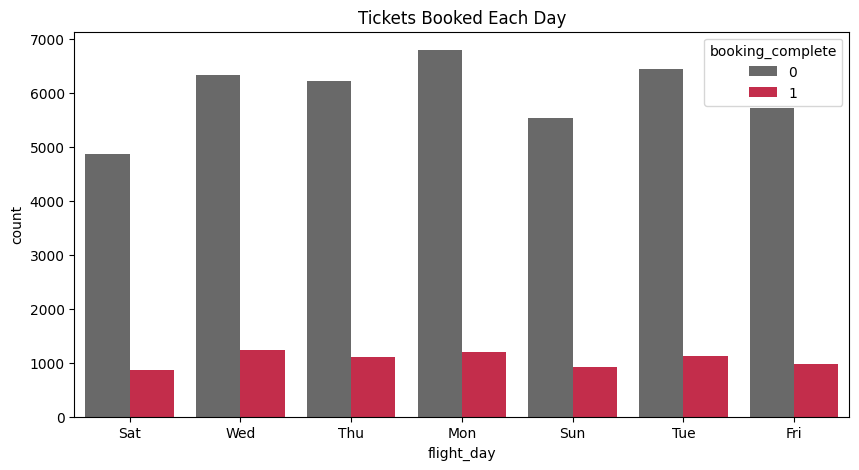

In [26]:
# Create a countplot for better understanding of the booking status on flight day
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='flight_day', hue='booking_complete', palette=['dimgrey','crimson'])
plt.title('Tickets Booked Each Day')
plt.show()

In [27]:
data['extra_baggage'].value_counts()

1    32931
0    16350
Name: extra_baggage, dtype: int64

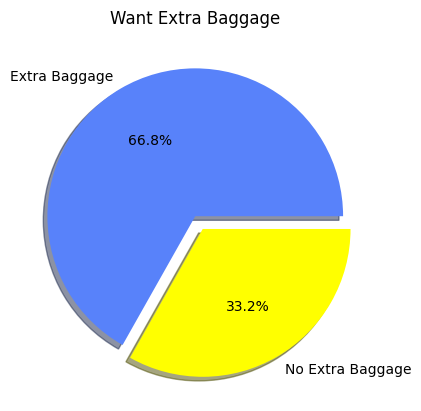

In [28]:
# Plot of Pie chart of customer who want extra bagagge
results = [32931,16350]
labels = ['Extra Baggage','No Extra Baggage']
plt.pie(results, labels=labels, explode=[0,0.1], autopct='%1.1f%%', colors=['#5882FA','#FFFF00'], shadow=True)
plt.title('Want Extra Baggage')
plt.show()

In [29]:
data['preferred_seat'].value_counts()

0    34712
1    14569
Name: preferred_seat, dtype: int64

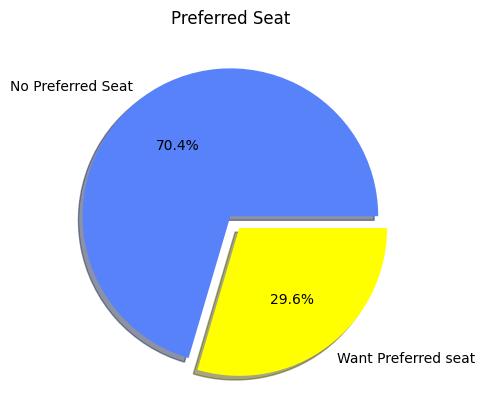

In [30]:
# Plot of Pie chart of customer who chose a preferred seats
results = [34712,14569]
labels = ['No Preferred Seat','Want Preferred seat']
plt.pie(results, labels=labels, explode=[0,0.1], autopct='%1.1f%%', colors=['#5882FA','#FFFF00'],shadow=True)
plt.title('Preferred Seat')
plt.show()

In [31]:
data['flight_meals'].value_counts()

0    28256
1    21025
Name: flight_meals, dtype: int64

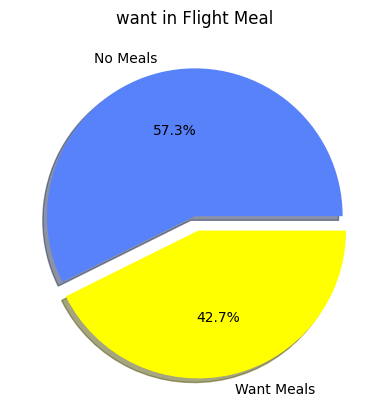

In [32]:
# Plot of Pie chart of customer who want flight meals
results = [28256,21025]
labels = ['No Meals','Want Meals']
plt.pie(results, labels=labels, explode=[0,0.1], autopct='%1.1f%%', colors=['#5882FA','#FFFF00'],shadow=True)
plt.title('want in Flight Meal')
plt.show()

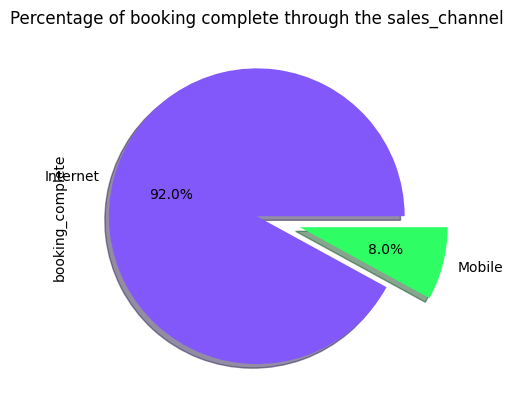

In [33]:
# Pie plot of the booking complete through sales channel
data.groupby('sales_channel')['booking_complete'].sum().plot(kind = 'pie',
  labels = ['Internet','Mobile'], colors = ['#8258FA','#2EFE64'],
  explode = [0,0.3], autopct = '%1.1f%%', shadow = True)
plt.title('Percentage of booking complete through the sales_channel')
plt.show()

In [34]:
round_trip = data[data['trip_type']=='RoundTrip']

In [35]:
round_trip.groupby(['flight_day'])[['booking_complete']].value_counts().unstack()\
.style.background_gradient(cmap='PuBuGn_r')

booking_complete,0,1
flight_day,,
Fri,5647,971
Mon,6724,1191
Sat,4809,853
Sun,5465,911
Thu,6151,1104
Tue,6350,1114
Wed,6267,1222


1    30879
2    12669
3     2882
4     1767
5      544
6      281
7      107
8       88
9       64
Name: num_passengers, dtype: int64


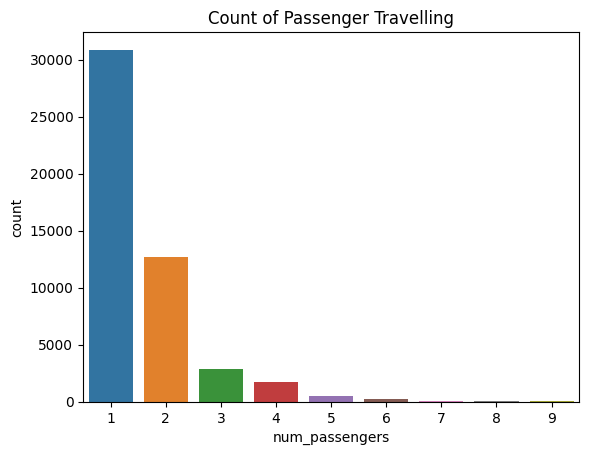

In [36]:
# Bar plot of count of number of passenger
print(data['num_passengers'].value_counts())

sns.countplot(data=data, x='num_passengers')
plt.title('Count of Passenger Travelling')
plt.show()

In [37]:
# Count of the top 15 length_of_stay spent by customer
# List of the top 15 length_of_stay spent by the customer
top_15_length = data['length_of_stay'].value_counts().head(15).index.to_list()

In [38]:
top_15_length = data[data['length_of_stay'].isin(top_15_length)]

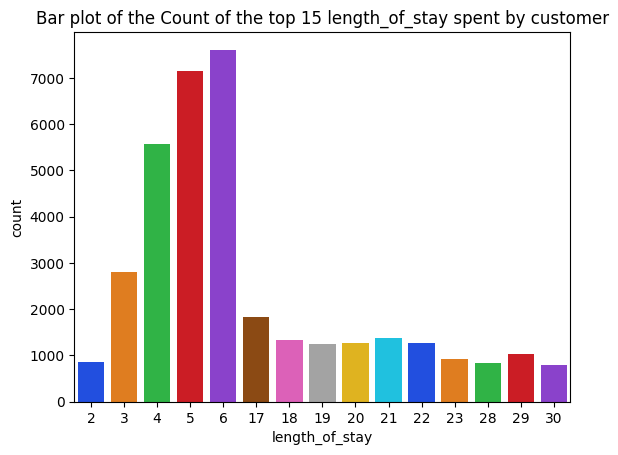

In [39]:
# Bar plot of the Count of the top 15 length_of_stay spent by customer
sns.countplot(top_15_length, x ='length_of_stay',palette='bright')
plt.title('Bar plot of the Count of the top 15 length_of_stay spent by customer')
plt.show()

<Axes: xlabel='flight_hour', ylabel='count'>

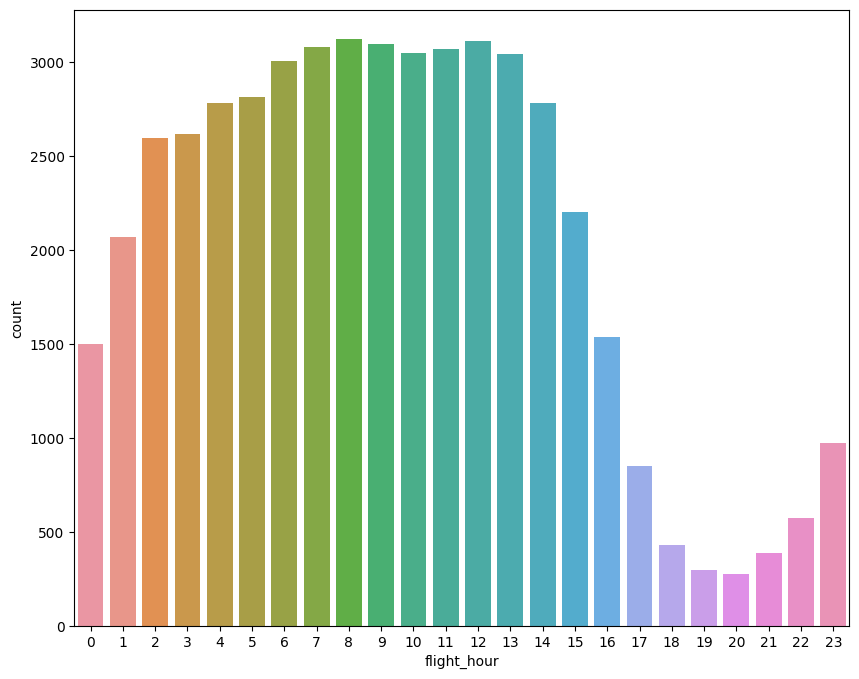

In [40]:
# Plot of Hour customer travel the most
plt.figure(figsize=(10,8))
sns.countplot(data, x='flight_hour')

In [41]:
data.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'extra_baggage', 'preferred_seat', 'flight_meals',
       'flight_duration', 'booking_complete'],
      dtype='object')

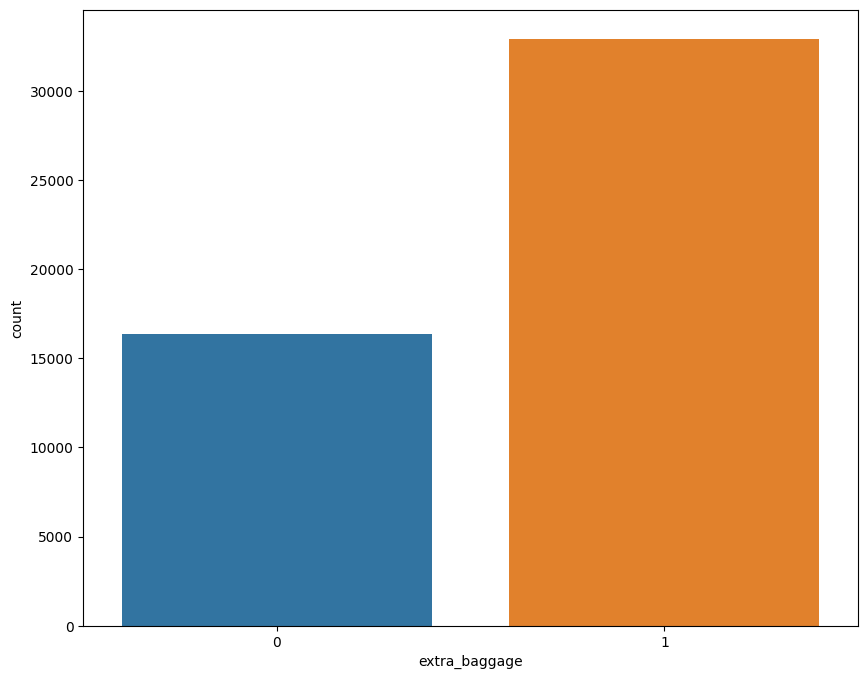

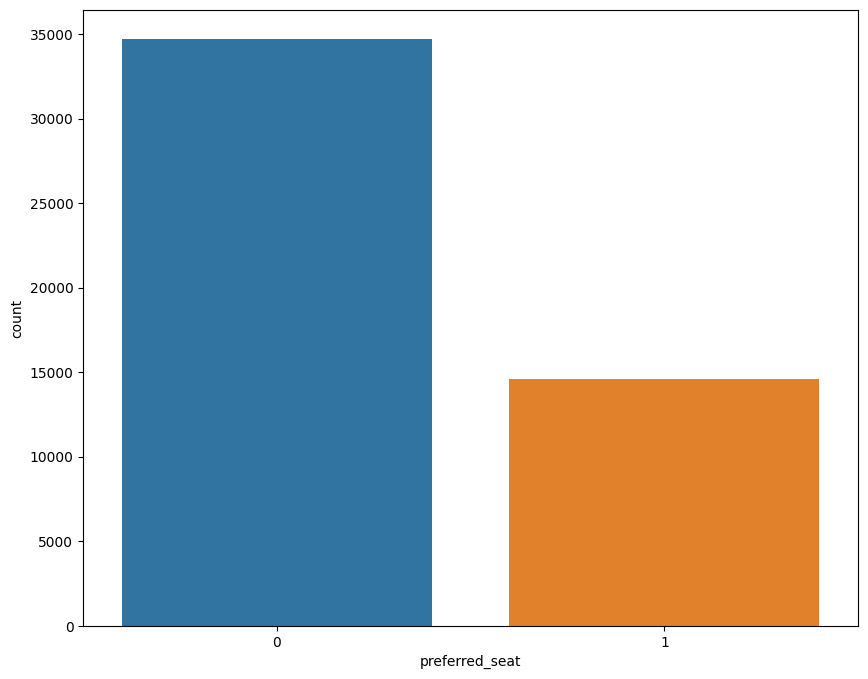

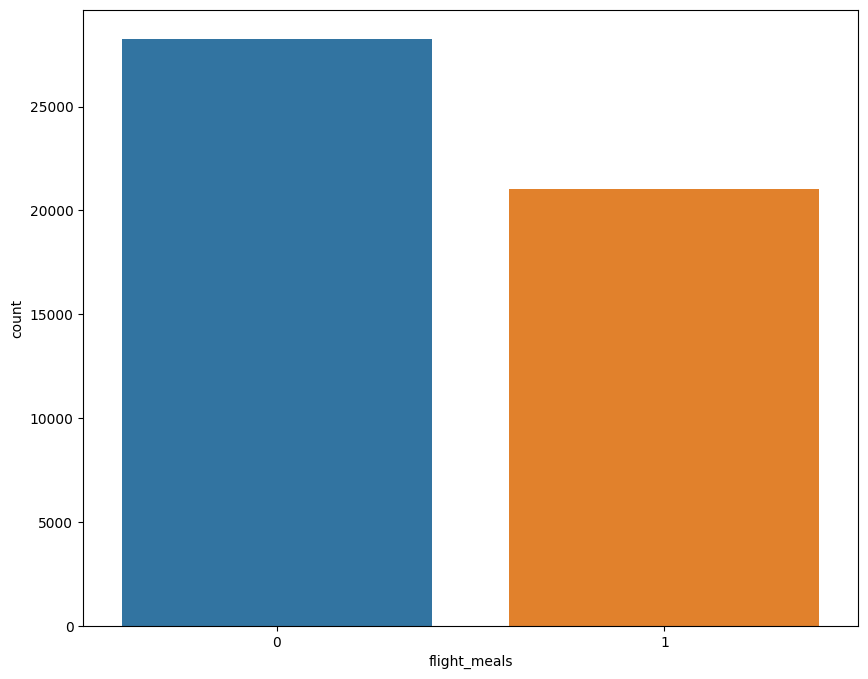

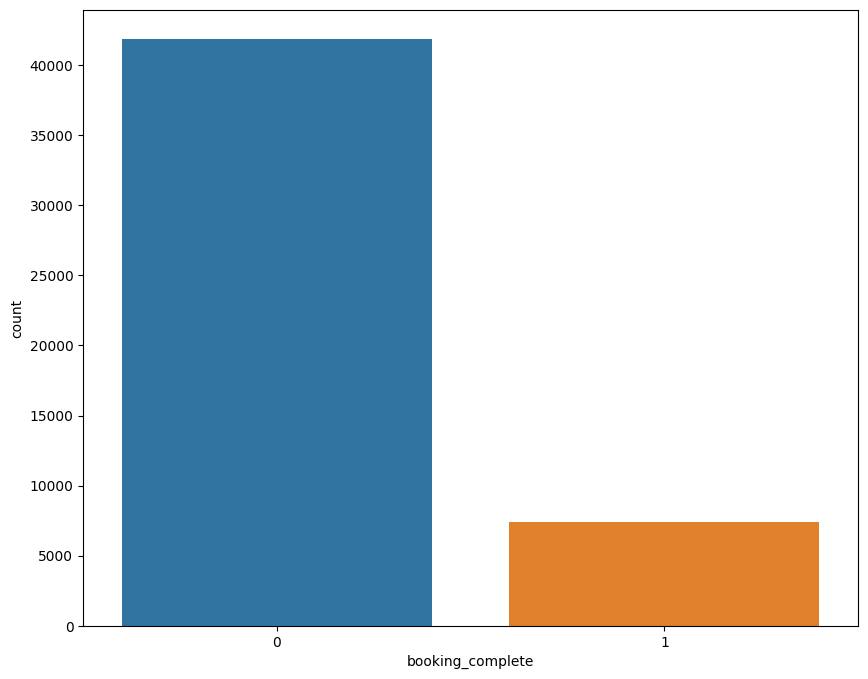

In [42]:
df = ['extra_baggage','preferred_seat','flight_meals', 'booking_complete']

for i,j in enumerate(df):
  plt.figure(figsize=(10,8))
  sns.countplot(x=data[j])
  plt.show()

In [43]:
# Count of the ticket booked per day using sales channel
data.groupby(['sales_channel'])[['flight_day']].value_counts().unstack()\
.style.background_gradient(cmap='gist_heat_r')

flight_day,Fri,Mon,Sat,Sun,Thu,Tue,Wed
sales_channel,,,,,,,
Internet,5897,7197,4965,5591,6606,6826,6835
Mobile,788,791,758,851,717,732,727


In [44]:
# Finding the busiest and least flight day
busiest_flight_day = data['flight_day'].value_counts().idxmax()
# idxmax: Return index of first occurrence of maximum over requested axis.
least_flight_day = data['flight_day'].value_counts().idxmin()

print('The busiest flight day in the flight booking is :', busiest_flight_day)
print('The least flight day in the flight booking is :', least_flight_day)

The busiest flight day in the flight booking is : Mon
The least flight day in the flight booking is : Sat


In [45]:
# Finding busiest and least booking origin
busiest_booking_origin = data['booking_origin'].value_counts().idxmax()
least_booking_origin = data['booking_origin'].value_counts().idxmin()

print('The busiest booking origin is :', busiest_booking_origin)
print('The least booking origin is :', least_booking_origin)

The busiest booking origin is : Australia
The least booking origin is : Vanuatu


# **Observation:**



*  During the Exporatory Data Analysis phase, i identified several interesting insights.
*   The distribution plot revealed that majority of purchase leads fall withing the range of 200 to 400.


*   Australia recored the highest number of purchase leads, followed by Malaysia.
*   Only 15% of the leads resulted in ticket bookings, indicating that 85% did not convert.


*   Countries like Jordan and New Zealand  had a higher average flight duration compared to others.
*   The pie chart showed that 92% of bookings were completed through the internet, while 8% were completed via mobiles devices.





